# The Affect of Loan Features on Loan Status Outcome
## by (Raghad Salem)

## Investigation Overview


> In this investigation i wanted to find what features could predict the outcome status of a loan, the main features i'm focusing on through this presentation:
><ol>
                <li>LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current,Defaulted,FinalPaymentInProgress, PastDue.</li>
    <li>BorrowerRate: The Borrower's interest rate for this loan.</li>
        <li>ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.</li>
    <li>MonthlyLoanPayment: The scheduled monthly loan payment.</li>

</ol>


## Key Insights for Presentation

><ul>
    <li>Both MonthlyLoanPayment and BorrowerRate affect on the LoanStatus the same, as the Monthly payment 
    increase it is more likely for the loan to be past due. therefore, increases the borrowerRate.</li>
                        <li>Borrwers with high  ProsperScore seem to take loans with higher monthly payments which results for them to be charged less BorrowerRate. </li>
</ul>


## Dataset Overview

>This dataset contains 113,937 rows and 81 columns, most data are in string objects or int type and a few columns are in float type.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('loan-data2.csv')
loan_data.head()


,Unnamed: 0,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatus,OpenCreditLines,IncomeRange,TotalProsperPaymentsBilled,LoanOriginalAmount,MonthlyLoanPayment
0,0,193129,36,Completed,0.16516,0.1580,NaN,Self-employed,4.0,"$25,000-49,999",NaN,9425,330.43
1,1,1209647,36,Current,0.12016,0.0920,7.0,Employed,14.0,"$50,000-74,999",NaN,10000,318.93
2,2,81716,36,Completed,0.28269,0.2750,NaN,Not available,NaN,Other,NaN,3001,123.32
3,3,658116,36,Current,0.12528,0.0974,9.0,Employed,5.0,"$25,000-49,999",NaN,10000,321.45
4,4,909464,36,Current,0.24614,0.2085,4.0,Employed,19.0,"$100,000+",11.0,15000,563.97


## LoanStatus Vs. MonthlyLoanPayment

> This box plot shows that`MonthlyLoanPayment` does have an affect on `LoanStatus`, Past Due loans seems to have more average monthly payment than those that are Completed, So the higher the monthly payment the more likely to be past due.

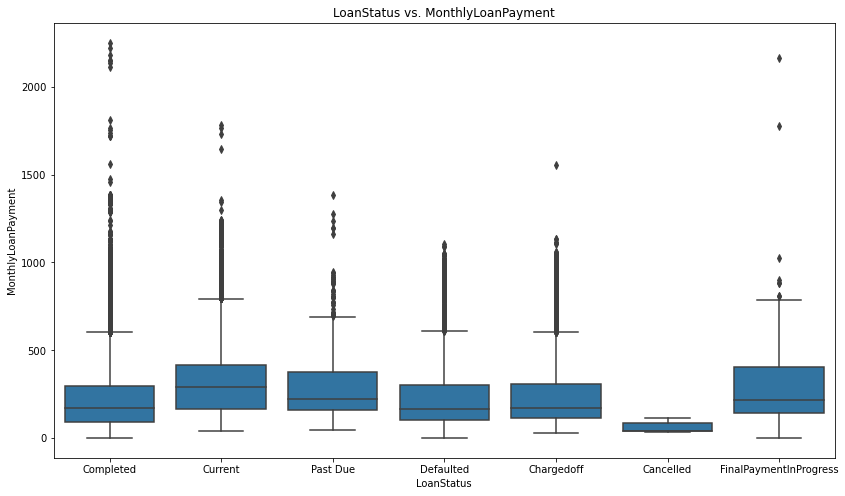

In [10]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(14,8))
sb.boxplot(data=loan_data , x='LoanStatus' , y='MonthlyLoanPayment' , color = base_color)
plt.title('LoanStatus vs. MonthlyLoanPayment');

## LoanStatus Vs. Prosper Score

>`ProsperScore` seems to have an affect on `LoanStatus`, borrowers with 8.0 score seem to be the most in Completed status, while borrwers with score 4.0 are the most borrowers with current loans, As for Chargedoff loans borrwers with score 6.0 seem to have the most chargedoff loans. 

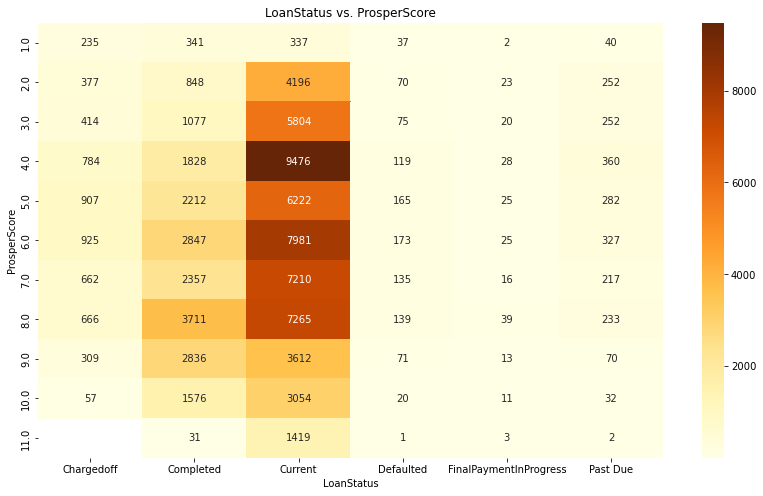

In [11]:
#get the score counts for each score and status and store that into a new dataframe
score_count = loan_data.groupby(['LoanStatus' , 'ProsperScore']).size()
score_count = score_count.reset_index(name='score_count')
score_count = score_count.pivot(index='ProsperScore' , columns='LoanStatus' , values='score_count')
#plot heatmap
plt.figure(figsize=(14,8))
sb.heatmap(score_count , annot=True, fmt='0.0f' , cmap='YlOrBr')

plt.title('LoanStatus vs. ProsperScore');

## LoanStatus Vs. BorrowerRate

>average `BorrwerRate` increases when the `LoanStatus` is Past Due or Chargedoff.

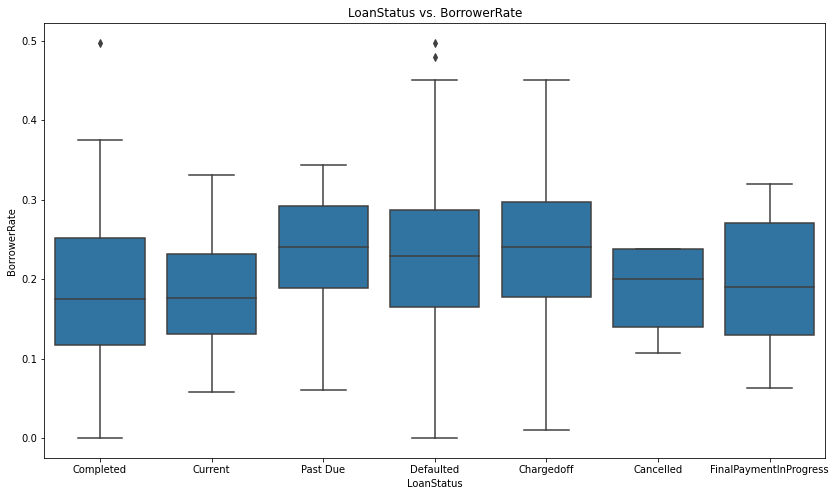

In [12]:
plt.figure(figsize=(14,8))
sb.boxplot(data=loan_data , x='LoanStatus' , y='BorrowerRate' , color = base_color)
plt.title('LoanStatus vs. BorrowerRate');

## Loan Status Vs. MonthlyLoanPayment Vs. BorrowerRate Vs. ProsperScore

>This multivariate violin plot shows the follwing:<br>
><ul>
>    <li>Both MonthlyLoanPayment and BorrowerRate affect on the LoanStatus the same, as the Monthly payment 
increase it is more likely for the loan to be past due. therefore, increases the borrowerRate.</li>
>    <li>Borrwers with high  ProsperScore seem to take loans with higher monthly payments which results for them to be charged less BorrowerRate. </li>
></ul>

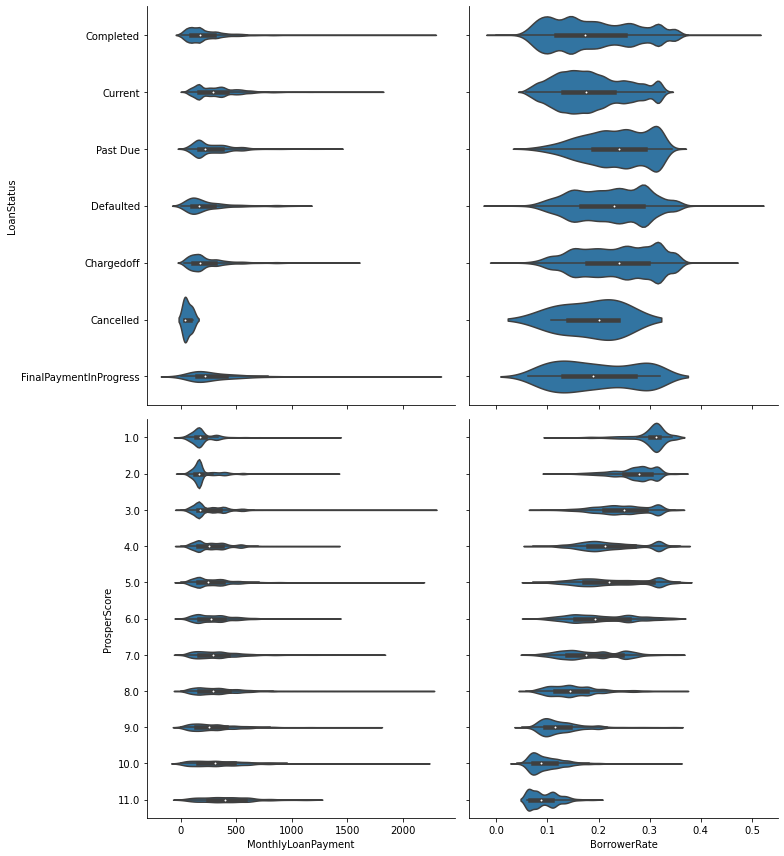

In [16]:
g = sb.PairGrid(data = loan_data, x_vars = ['MonthlyLoanPayment', 'BorrowerRate'],
                y_vars = ['LoanStatus','ProsperScore'])
g.map(sb.violinplot ,color=base_color, orient='h')
g.fig.set_size_inches(11,12)
plt.tight_layout() 

In [14]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

zsh:1: no such file or directory: Part_II_Filename
